In [1]:
from env import host, user, password
import acquire
import prepare
import explore
import evaluate
import model

# Aquire Zillow Data
This data was obtained through the Zillow database through Codeup Sequel server.
- For more detail on the SQL query used to gather the data please see the acquire.py found in the github repository.

In [2]:
df = acquire.acquire_zillow()
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,None,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,None,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,None,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30


# Prepare/Clean the Data
This is some messy data! We need to get this cleaned up and easier to use!


*But how will we do this?*
- By **creating new features** `house age` and `tax_rate`
- **dropping all columns with less than 35 thousand non null values.**
    - this means each feature needs to have at least 90% non null values
- **Remove features**
    - calculatedbathnbr, finishedsquarefeet12, propertycountylandusecode, logerror, transactiondate, yearbuilt, taxvaluedollarcnt, landtaxvaluedollarcnt, rawcensustractandblock
- **Rename features**
    - bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, regionidzip, regionidcity, regionidcounty
- **Handle Outliers** using the IQR rule for features
    - appraised_value, square_feet, bedrooms
    
For more detail on the code used to clean the data please see the prepare.py on the github repository

In [3]:
df = prepare.clean_zillow(df)

# Lets Start Exploring!

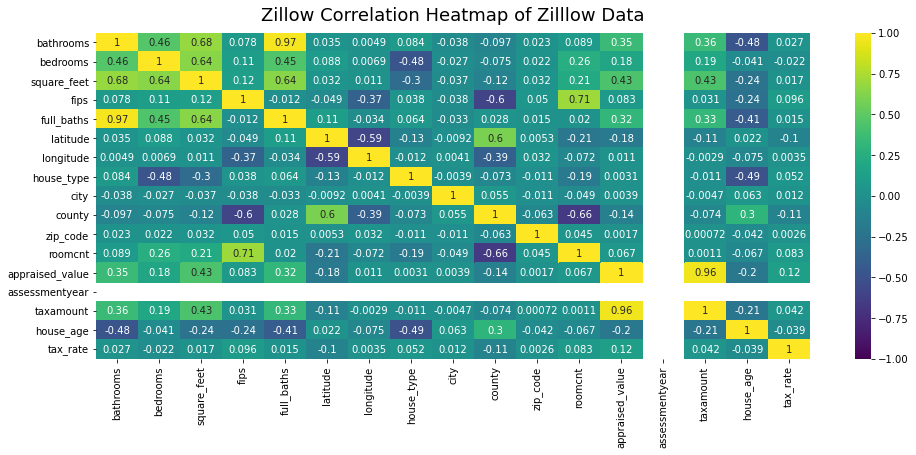

In [4]:
explore.plot_zillow_heatmap()

Above is a correlation heatmap for the cleaned zillow data set.
- My target is `appraised_value`
    - Strongest correlations are
        - square_feet
            - 0.43
        - bathrooms
            - 0.35
        - bedrooms
            - 0.18
        - lattitude
            - -0.18
        - county
            - -0.14
        - house_age
            - 0.13
        - tax_rate
            - 0.12
            
I decided to focus on square feet, bathrooms, and bedrooms.

## Explore the Train Data Set

Start by splitting your data
- for more information on the code used to explore please see the explore.py on the github repository.

#### Split the Data

In [5]:
train, validate, test = prepare.split_focused_zillow(df)

#### Scale the Data

In [6]:
train_scaled, validate_scaled, test_scaled = prepare.scale_focused_zillow(train, validate, test)

Lets focus on just train data set while we start exploring and put scaled in our back pocket for later

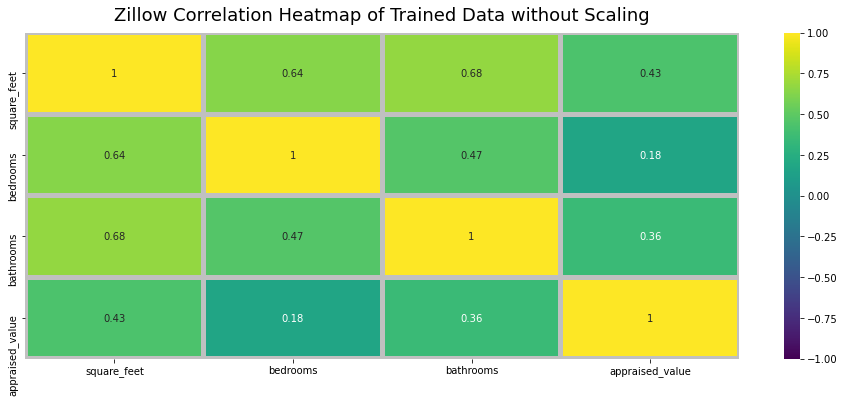

In [7]:
explore.plot_train_heatmap()

Here we can see a correlation heatmap specifically on the train data set
- The darker blue represents a stronger positive correlation between two features
- The yellow the stronger the negative correlation between 2 features
- The correlations to the `appraise_value` feature are:
    - `square_feet`
        - 0.43
            - positive correlation
    - `bathrooms`
        - 0.36
            - positive correlation
    - `bedrooms`
        - 0.18
            - positive correlation


## Using Scatterplots to see the Relationships to Appraised Value

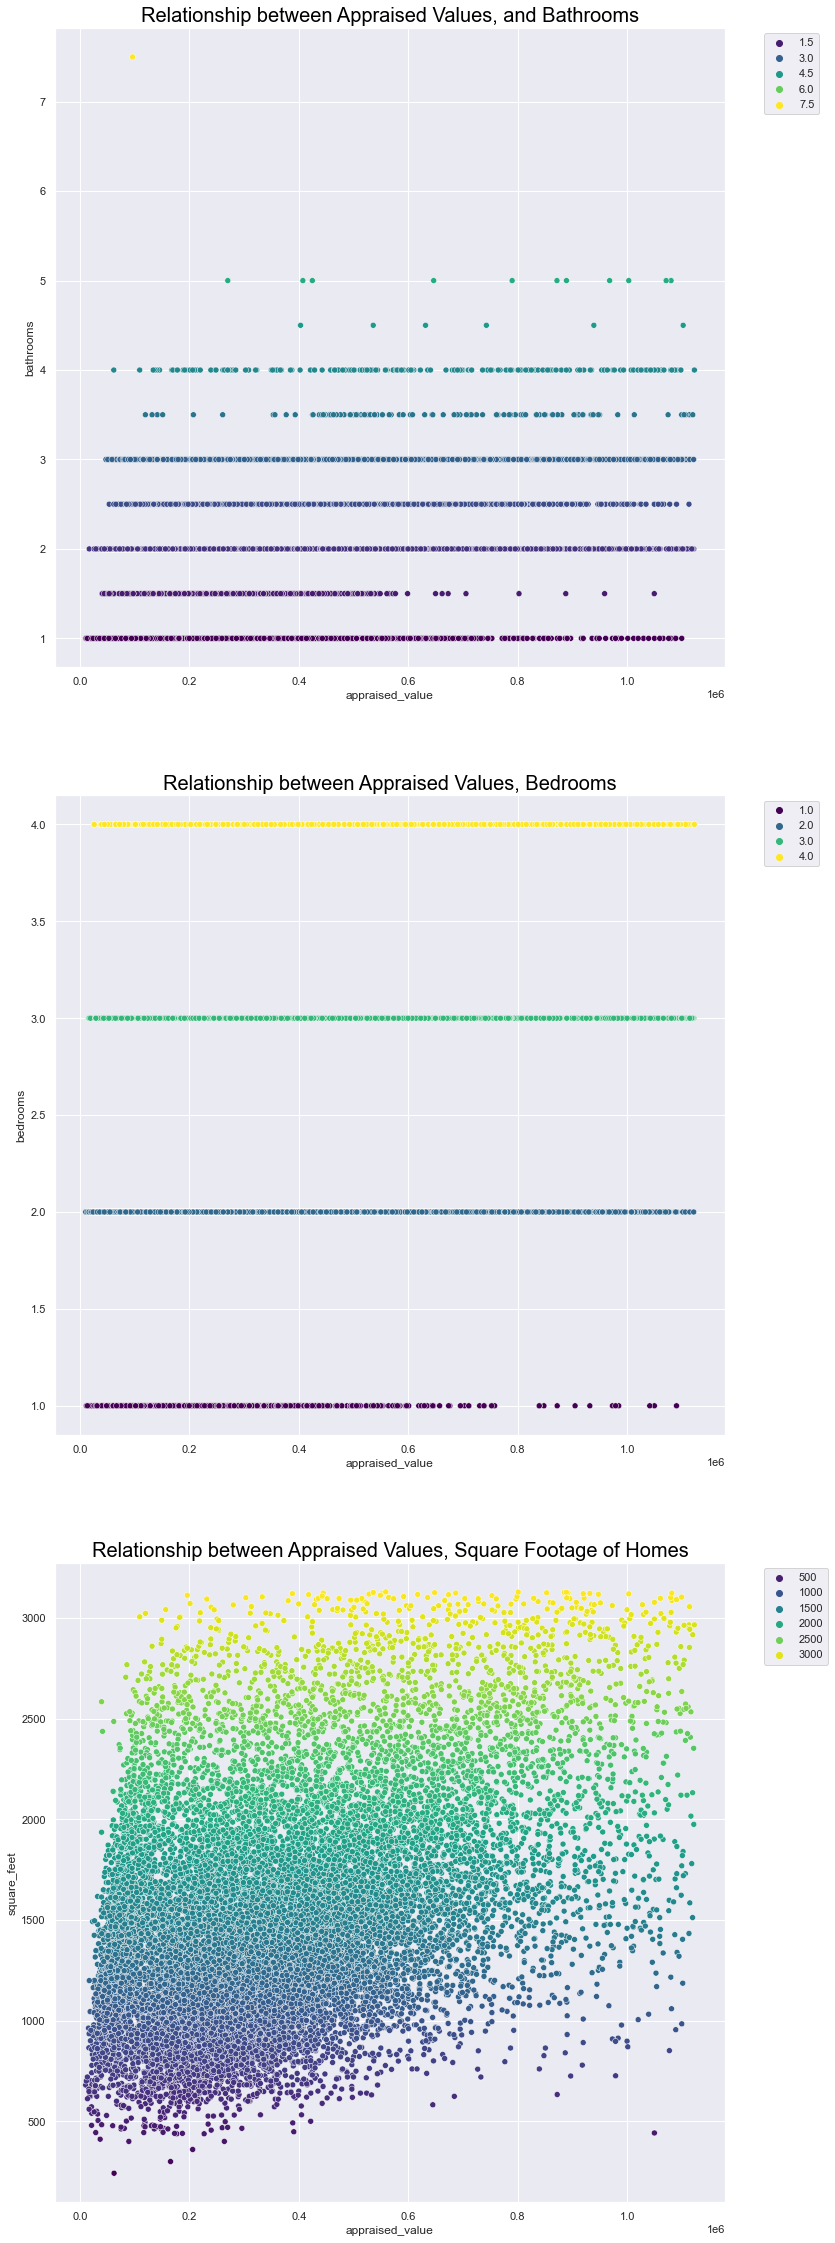

In [8]:
explore.plot_scatter_plots()

Takeaways of Relationship Scatter Plots:
- I can definatly see a relationship between `appraise_value` and `square_feet`
- There seems to be a noticeable difference in the amount of homes with a low appraised value and low square footage vs. homes with a higher appraised value's square footage
    - the lowe the 
- Homes with 1 bedroom seem to drop off when appraised values get higher while the 2+ bedroom houses seem to contiue rising with the appraised value

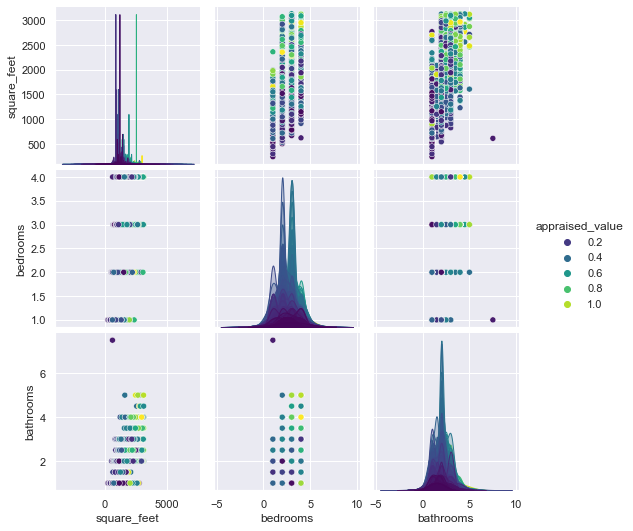

In [9]:
explore.train_pairplot()

Takeaways:
- We can ignore where features overlap theselves because it is not helpful.
- It seems as though if homes wiht more bathrooms and larger amount of square feet tend to be appraised at a higher amount.
    - this is seen in the top right graph
        - the yellow which indicated the higher apppraisal rate takes up mosre population the higher the bathroom number and amount of square feet get
- we can see a gradual increase in appraisal price in the bedrooms and bathrooms relationship.
    - when both features are high we move into higher appraisal values
        - indicated by the green
    - and the lower amount the features are the lower the amount the appraisal value seems to become
        - indicated by dark blue

## Explore Bathroom Feature

**Null Hypothesis** : 
- "There is no correlation between number of bathrooms and appraised value."

**Alternative Hypothesis** :
- "There is a correlation between number of bathrooms and appraised value."

 The correlation between Bathrooms and the Appraised value is:  0.3561501661540747
 The P value between Bathrooms and Appraised Value is:  0.0
 
Reject null hypothesis: 'There is no correlation between number of bathrooms and appraised value.'
 
We now move forward with our alternative hypothesis: 'There is a correlation between number of bathrooms and appraised value.'
 
This is a weak positive correlation.


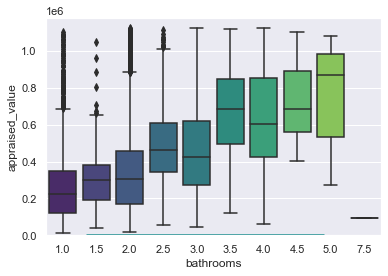

In [10]:
explore.bathroom_corr()

## Explore Bedroom Feature
**Null Hypothesis** : 
- "There is no correlation between number of bedrooms and appraised value."

**Alternative Hypothesis** :
- "There is a correlation between number of bedrooms and appraised value."


 The correlation between Bathrooms and the Appraised value is:  0.1774791679889962
 The P value between Bathrooms and Appraised Value is:  7.710497170607393e-129
 
Reject null hypothesis: 'There is no correlation between number of bedrooms and appraised value.'
 
We now move forward with our alternative hypothesis: 'There is a correlation between number of bedrooms and appraised value.'
 
This is a weak positive correlation.


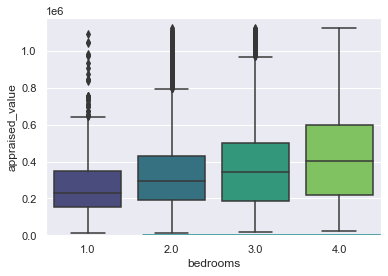

In [11]:
explore.bedroom_corr()

## Explore Square Feet Feature
**Null Hypothesis** : 
- "There is no correlation between a homes square footage and appraised value."

**Alternative Hypothesis** : 
- "There is a correlation between square feet and appraised value."

 The correlation between Bathrooms and the Appraised value is:  0.43158543063336313
 The P value between Bathrooms and Appraised Value is:  0.0
 
Reject null hypothesis: 'There is no correlation between a homes square footage and appraised value.'
 
We now move forward with our alternative hypothesis: 'There is a correlation between square feet and appraised value.'
 
This is a weak positive correlation.


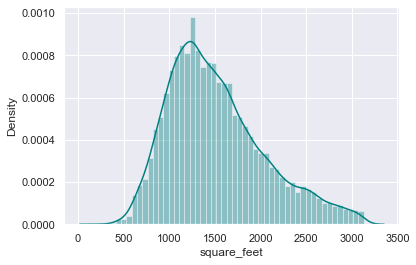

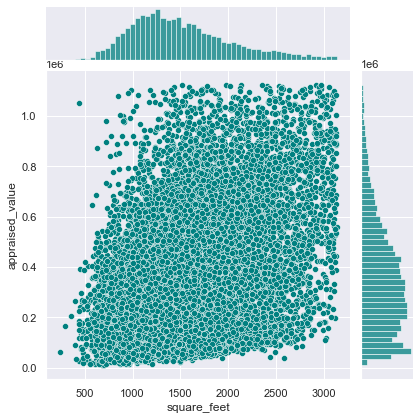

In [12]:
explore.square_feet_corr()

## Evaluation Time
For more informaiton on the code used in the evaluation stage please see the evaluation.py found in the github repository.

In [13]:
y_train, y_validate = evaluate.eval_y_train()
y_train.head()

,appraised_value,appraised_value_pred_median,appraised_value_pred_mean
31538,292000.0,329107.0,364215.53
5911,97093.0,329107.0,364215.53
20091,80091.0,329107.0,364215.53
36157,34746.0,329107.0,364215.53
1799,177000.0,329107.0,364215.53


I will continue with using baseline median

In [14]:
SSE, SSE_baseline, MSE, MSE_baseline, RMSE, RMSE_baseline = evaluate.SSE_MSE_RMSE()

SSE =  911614726222345.5
SSE Baseline =  941263447006771.6
------------------------------------------
MSE =  28013481845.687
MSE baseline =  28924572767.709
------------------------------------------
RMSE =  167372.285
RMSE baseline =  170072.257
------------------------------------------


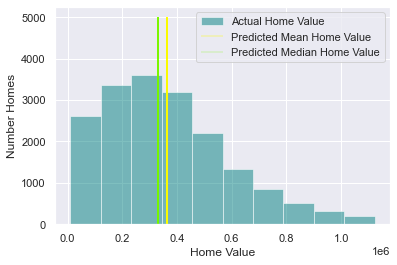

In [15]:
evaluate.SSE_MSE_RMSE_info()

# Lets Start Modeling!
For more detail on code used please see model.py.

## Establish the baseline

In [16]:
model.get_baseline()

RMSE using Mean
Train/In-Sample:  227271.86 
Validate/Out-of-Sample:  228115.48
 
RMSE using Median
Train/In-Sample:  229967.62 
Validate/Out-of-Sample:  228115.48


## Evaluate each model

In [17]:
model.all_models_info()

RMSE for OLS using LinearRegression
Training/In-Sample:  201813.73681808176 
Validation/Out-of-Sample:  202696.95094364075
--------------------------------------------------------------
RMSE for Lasso + Lars
Training/In-Sample:  20364445665.7664 
Validation/Out-of-Sample:  20542786732.111324
--------------------------------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  25826248340.195675 
Validation/Out-of-Sample:  26018336332.93955
--------------------------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  20298379492.33372 
Validation/Out-of-Sample:  20476129727.74332


## Choosing the Model

In [18]:
model.choose_best_model()

Model Selected: RMSE for OLS using Linear Regression
--------------------------------------------------------------
RMSE using Mean
Train/In-Sample:  227271.86 
Validate/Out-of-Sample:  228115.48
--------------------------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  201813.73681808176 
Validation/Out-of-Sample:  202696.95094364075


## Plotting Actual vs. Predicted Values

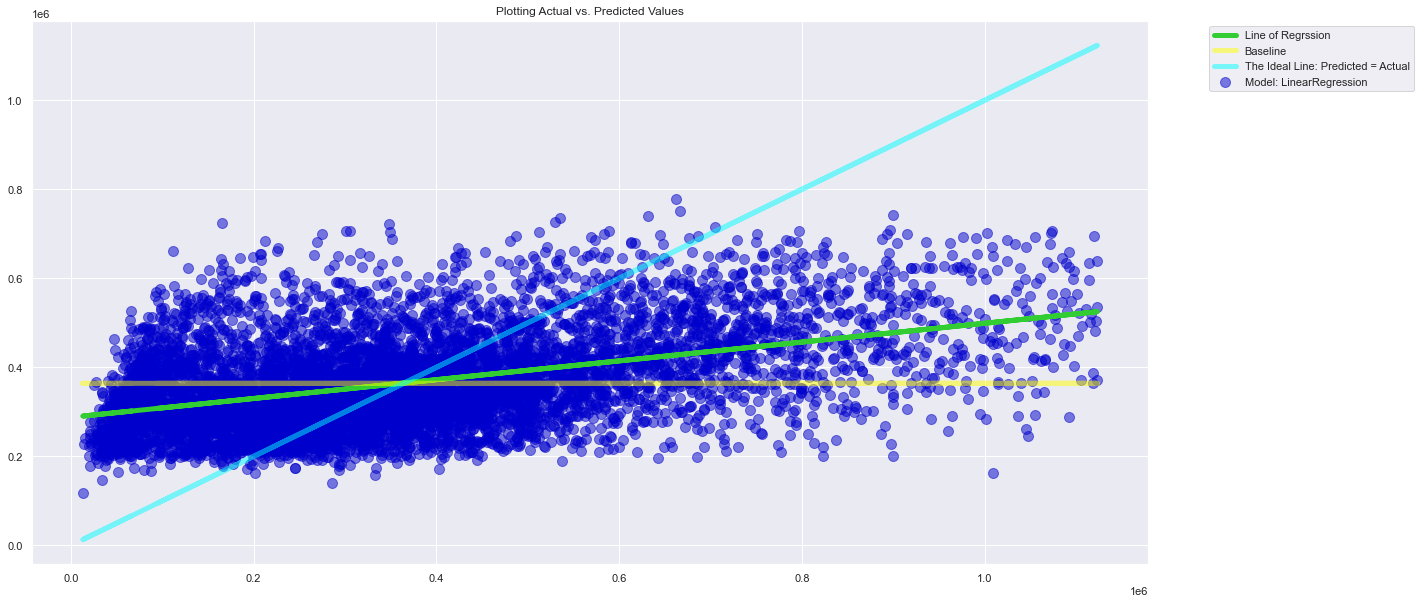

In [19]:
model.plot_actual_and_pred()

## Visualize Actual vs Predicted with Histograms

In [ ]:
model.hist_ols_appraised_value()

## Residual Plots: Plotting the Errors in Predictions

In [ ]:
model.plot_ols_errors()